# Explore the data

## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

## Load the data

In [2]:
raw_data = pd.read_csv('unicef_data.csv', index_col='Country')
raw_data

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",Life expectancy: female 2018,GDP per capita (current US$) 2018,At least basic drinking water services (%) 2017,At least basic sanitation services (%) 2017
Country,,,,,
Afghanistan,62.0,66.0,556.3,67.0,43.0
Albania,9.0,80.0,4532.9,91.0,98.0
Algeria,23.0,78.0,4048.3,94.0,88.0
Andorra,3.0,NaN,39134.4,100.0,100.0
Angola,77.0,64.0,4095.8,56.0,50.0
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),25.0,76.0,16054.5,96.0,94.0
Viet Nam,21.0,79.0,2365.6,95.0,84.0
Yemen,55.0,68.0,963.5,63.0,59.0


# Cluster Analysis

### Import relevant libraries

In [3]:
from sklearn.cluster import KMeans

## Under-5 Mortality rate & At least basic drinking water services (%) 2017

### Selecting the features

In [6]:
x = raw_data.iloc[:,:4]
x = x.drop('Life expectancy: female 2018', axis=1)
x = x.drop('GDP per capita (current US$) 2018', axis=1)
x

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",At least basic drinking water services (%) 2017
Country,,
Afghanistan,62.0,67.0
Albania,9.0,91.0
Algeria,23.0,94.0
Andorra,3.0,100.0
Angola,77.0,56.0
...,...,...
Venezuela (Bolivarian Republic of),25.0,96.0
Viet Nam,21.0,95.0
Yemen,55.0,63.0


### Preprocessing

In [7]:
x.isnull().sum()

Under-5 mortality rate (deaths per 1,000 live births) 2018    7
At least basic drinking water services (%) 2017               7
dtype: int64

#### Remove rows with missing values

In [8]:
x_no_mv = x.dropna(axis=0)
x_no_mv.describe(include='all')

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",At least basic drinking water services (%) 2017
count,190.000000,190.000000
mean,27.642105,87.905263
std,27.860733,15.922812
min,2.000000,39.000000
25%,7.000000,81.000000
50%,16.500000,96.000000
75%,43.250000,99.750000
max,122.000000,100.000000


### Use Elbow Method to determine optimal number of clusters

In [9]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_no_mv)
    wcss.append(kmeans.inertia_)

wcss

[194623.95789473684,
 49319.082356346786,
 31137.077195995564,
 20813.524092643158,
 16853.04550456546,
 13432.555760252819,
 11392.902843374937,
 10208.838034188033,
 9022.352478632478]

Text(0, 0.5, 'WCSS')

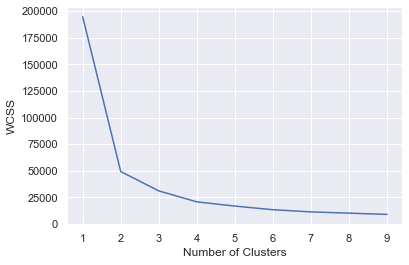

In [10]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

It appears that the optimal number of clusters is 2 according to the elbow method

### Clustering

#### 2 clusters

In [11]:
kmeans = KMeans(2)
results = kmeans.fit_predict(x_no_mv)
results

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [12]:
x_w_clusters = x_no_mv.copy()
x_w_clusters['cluster'] = results
x_w_clusters

,"Under-5 mortality rate (deaths per 1,000 live births) 2018",At least basic drinking water services (%) 2017,cluster
Country,,,
Afghanistan,62.0,67.0,1
Albania,9.0,91.0,0
Algeria,23.0,94.0,0
Andorra,3.0,100.0,0
Angola,77.0,56.0,1
...,...,...,...
Venezuela (Bolivarian Republic of),25.0,96.0,0
Viet Nam,21.0,95.0,0
Yemen,55.0,63.0,1


Text(0, 0.5, 'At least basic drinking water services (%) 2017')

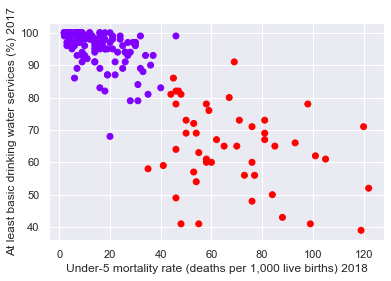

In [17]:
plt.scatter(x_w_clusters['Under-5 mortality rate (deaths per 1,000 live births) 2018'],x_w_clusters['At least basic drinking water services (%) 2017'],c=x_w_clusters['cluster'],cmap='rainbow')
plt.xlabel('Under-5 mortality rate (deaths per 1,000 live births) 2018')
plt.ylabel('At least basic drinking water services (%) 2017')

##### Analysis of plot and clusters

The data seems to be relatively linear with an inverse relationship between Under-5 mortality rate and at least basic drinking water services. The two clusters could be labeled as "Countries with low under-5 mortality rates and high basic drinking water services" and "Countries with high under-5 mortality rates and low basic drinking water services". Although there is a linear relationship, there appears to be some hederoscedasticity in the data making it nearly useless for linear regression